<a href="https://colab.research.google.com/github/Aryan1295/DEC-mini-project/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 4.80 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [4]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=236c1886db42ca62a8e3a7e73049b6b291d9378f84d038547c68febf7d5c2401
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [6]:
!bash ./scripts/download_cyclegan_model.sh monet2photo

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
for details.

--2024-11-06 03:04:38--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’

./checkpoints/monet 100%[===================>]  43.46M  61.2MB/s    in 0.7s    

2024-11-06 03:04:38 (61.2 MB/s) - ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [15]:
from PIL import Image
import os

def remove_corrupted_images(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Check if the image can be fully loaded
        except (IOError, SyntaxError):
            print(f"Removing corrupted image: {file_path}")
            os.remove(file_path)

# Apply to each folder in the dataset
remove_corrupted_images("/content/dataset/trainA")
remove_corrupted_images("/content/dataset/trainB")
remove_corrupted_images("/content/dataset/testA")
remove_corrupted_images("/content/dataset/testB")


Removing corrupted image: /content/dataset/trainB/0015.png
Removing corrupted image: /content/dataset/trainB/0125.png
Removing corrupted image: /content/dataset/trainB/0244.png
Removing corrupted image: /content/dataset/trainB/0008.png
Removing corrupted image: /content/dataset/trainB/0061.png
Removing corrupted image: /content/dataset/trainB/0145.png
Removing corrupted image: /content/dataset/trainB/0143.png
Removing corrupted image: /content/dataset/trainB/0075.png
Removing corrupted image: /content/dataset/trainB/0246.png
Removing corrupted image: /content/dataset/trainB/0270.png
Removing corrupted image: /content/dataset/trainB/0103.png
Removing corrupted image: /content/dataset/trainB/0172.png
Removing corrupted image: /content/dataset/trainB/0012.png
Removing corrupted image: /content/dataset/trainB/0039.png
Removing corrupted image: /content/dataset/trainB/0011.png
Removing corrupted image: /content/dataset/trainB/0176.png
Removing corrupted image: /content/dataset/trainB/0009.p

In [19]:
!python train.py --dataroot /content/dataset --name Monet2Photo_resolution --model cycle_gan --epoch_count 50 --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/dataset              	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

In [23]:
!python test.py --dataroot /content/dataset/testA --name monet2photo_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/dataset/testA        	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [22]:
ls ./checkpoints/monet2photo_pretrained/

latest_net_G.pth


In [27]:
ls ./results/monet2photo_pretrained/test_latest/images/


0_fake.png    106_real.png  113_fake.png  11_real.png   127_fake.png  133_real.png  140_fake.png
0_real.png    107_fake.png  113_real.png  120_fake.png  127_real.png  134_fake.png  140_real.png
100_fake.png  107_real.png  114_fake.png  120_real.png  128_fake.png  134_real.png  141_fake.png
100_real.png  108_fake.png  114_real.png  121_fake.png  128_real.png  135_fake.png  141_real.png
101_fake.png  108_real.png  115_fake.png  121_real.png  129_fake.png  135_real.png  142_fake.png
101_real.png  109_fake.png  115_real.png  122_fake.png  129_real.png  136_fake.png  142_real.png
102_fake.png  109_real.png  116_fake.png  122_real.png  12_fake.png   136_real.png  14_fake.png
102_real.png  10_fake.png   116_real.png  123_fake.png  12_real.png   137_fake.png  14_real.png
103_fake.png  10_real.png   117_fake.png  123_real.png  130_fake.png  137_real.png  1_fake.png
103_real.png  110_fake.png  117_real.png  124_fake.png  130_real.png  138_fake.png  1_real.png
104_fake.png  110_real.png  118_fake

# Visualize

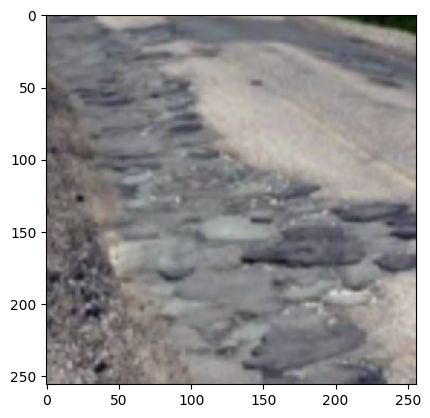

In [32]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/11_real.png')
plt.imshow(img)

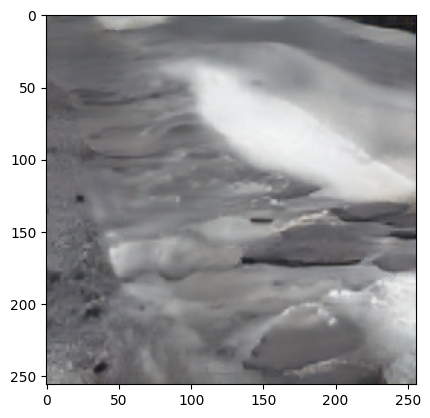

In [29]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/11_fake.png')
plt.imshow(img)